In [ ]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import time
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
#import gensim

Q1

In [ ]:
url="https://thinkil.co.il/texts-sitemap.xml"
res=requests.get(url, verify=False)
soup = BeautifulSoup(res.content, ['lxml', 'xml'])
soup_list = soup.findChildren('loc')
urls_list = []
for element in soup_list:
    net = element.get_text()
    if net.endswith(('jpg','png')) == False: #TODO: It's probably not the most elegant way to do it, but I had a hard time using the  BeautifulSoup package
        urls_list.append(net)
#remove the first link
dat = pd.DataFrame(columns=['url','title','auther','text'])
dat.url = urls_list[1:]
dat

In [ ]:
for i in range(len(dat)):
    time.sleep(1)
    res = requests.get(dat.loc[i,'url'])# verify=False)
    res.content
    soup = BeautifulSoup(res.content, 'html.parser')
#     title = soup.title.string.split(' - ')[0]
    title_author = soup.findChildren('hgroup')[0].get_text().split('מאת:')
    title = title_author[0]
    author = title_author[1]
    text = soup.findChildren('article')[0].get_text()
    dat.loc[i,1:] = [title,author,text]

In [ ]:
dat.to_csv('articles_data.tsv', sep='\t')

In [ ]:
dat = pd.read_csv('articles_data.tsv', sep='\t', index_col='Unnamed: 0')
dat

Q2a-b

In [ ]:
def to_words(text):
    return text.split()

def words_num_bar(texts):
    words_num = [len(to_words(text)) for text in texts]
    plt.bar(range(len(words_num)), words_num, color='b')
#     plt.xticks(indices, word, rotation='vertical')
    plt.tight_layout()
    plt.show()

def words_num_hist(texts):
    words_num = [len(to_words(text)) for text in texts]
    plt.hist(words_num, bins=50)
#     plt.xticks(indices, word, rotation='vertical')
#     plt.tight_layout()
    plt.show()
    
# def words_hist(words):
#     cv = CountVectorizer(words)
#     cv.vocabulary_

In [ ]:
# dat['num_word'] = 'NA'
# words = []
# for i in range(len(dat)):
#     words = dat.text[i].split()
#     dat.num_word[i] = len(words)
# dat

In [ ]:
# # words_hist(to_words(dat.loc[0,'text']))
# cv = CountVectorizer(to_words(dat.loc[0,'text']))
# cv.vocabulary_

In [ ]:
# # X = cv.fit_transform(to_words(dat.loc[0,'text']))
# X = cv.fit_transform(dat.text)
# print(X.toarray())
# # print(cv.get_feature_names(to_words(dat.loc[0,'text'])))

In [ ]:
words_num_bar(dat.text)

In [ ]:
words_num_hist(dat.text)

Q2c

In [ ]:
all_words = " ".join(dat["text"]).split()

def invert_words(words):
    return [w[::-1] for w in words]

def plot_20_common(words):
    word_count = Counter(words)
    most=word_count.most_common(20)
    x, y= zip(*most)
    sns.barplot(x=y,y=invert_words(x))
    
plot_20_common(all_words)

Q2e

In [ ]:
stop = list(pd.read_csv('heb_stopwords.txt', sep='\n', header=None)[0])

In [ ]:
all_words = " ".join(dat["text"]).split()

def invert_words(words):
    return [w[::-1] for w in words]

def plot_20_common_without_stop(words):
    word_count = Counter(words)
    most=word_count.most_common()
    x, y= [], []
    for word,count in most:
        if (word not in stop):
            x.append(word)
            y.append(count)
        if len(x)==20:
            break

    sns.barplot(x=y,y=invert_words(x))
    
plot_20_common_without_stop(all_words)

## Q2 d + f

In [ ]:
all_words = " ".join(dat["text"]).split()
all_words

In [81]:
def merge(list1, list2): 
      
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list 

def plot_top_ngrams_barchart(text, n=2,stop_word=False):
    vec = CountVectorizer(ngram_range=(n, n)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    if (stop_word):
        x, y= [], []
        for word,count in words_freq:
            word = word.split()
            if (word[0] not in stop and word[1] not in stop):
                word = word[0] + " " + word[1]
                x.append(word)
                y.append(count)
            if len(x)==20:
                break
        words_freq = merge(x,y)
    words_freq = words_freq[:10]
    x,y=map(list,zip(*words_freq))
    sns.barplot(x=y,y=invert_words(x))

#plot_top_ngrams_barchart(all_words,2)

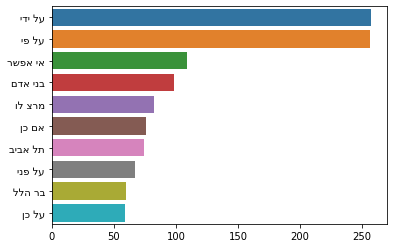

In [83]:
plot_top_ngrams_barchart(all_words,2,False)

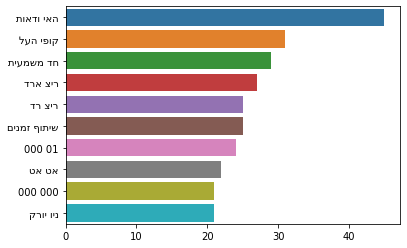

In [82]:
plot_top_ngrams_barchart(all_words,2,True)